In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

/tmp/ipython-input-485180870.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=overall_df, palette='viridis')


<Figure size 1200x600 with 0 Axes>

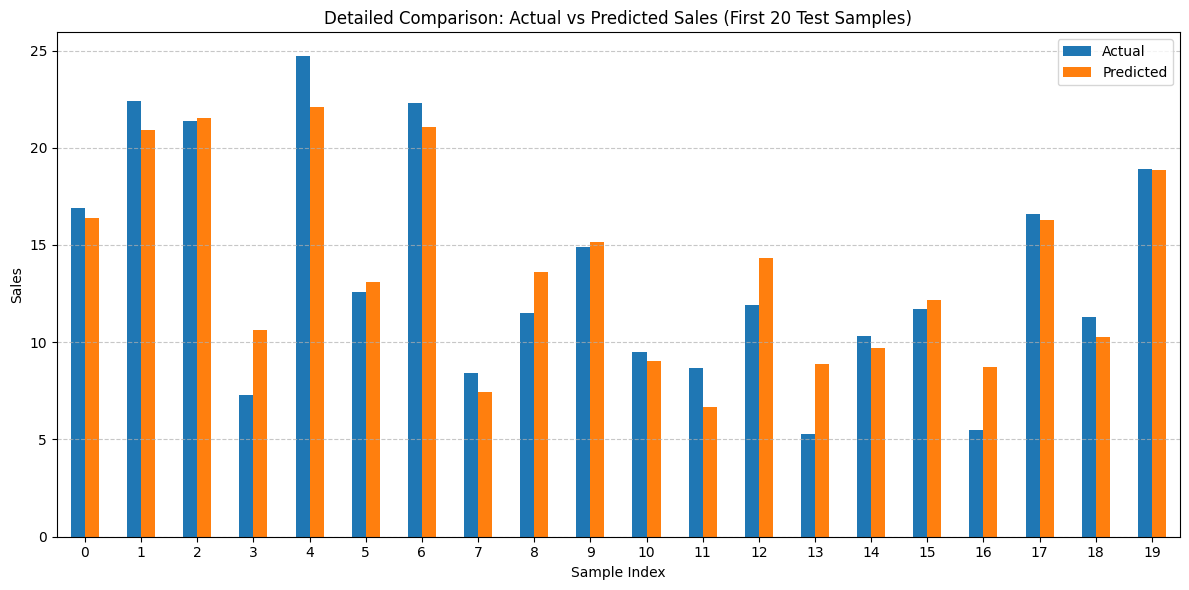

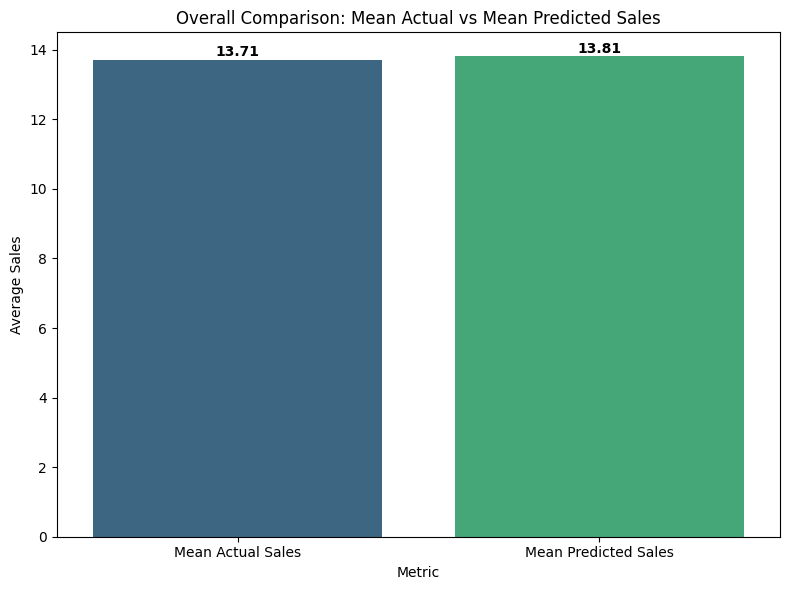

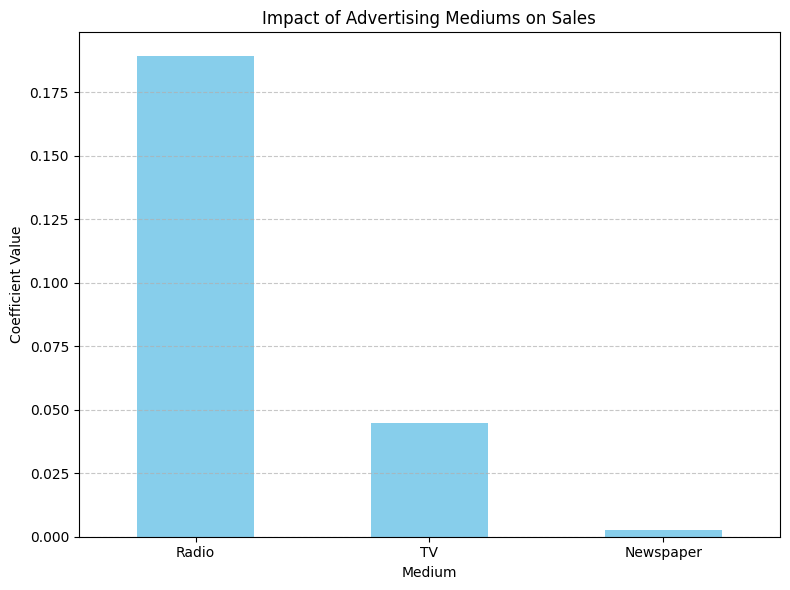

In [4]:
df = pd.read_csv('/content/Advertising.csv')

if df.columns[0] == 'Unnamed: 0' or df.columns[0] == '':
    df = df.drop(df.columns[0], axis=1)

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True).head(20)

plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Detailed Comparison: Actual vs Predicted Sales (First 20 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('detailed_prediction_vs_actual.png')

overall_df = pd.DataFrame({
    'Metric': ['Mean Actual Sales', 'Mean Predicted Sales'],
    'Value': [y_test.mean(), y_pred.mean()]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=overall_df, palette='viridis')
plt.title('Overall Comparison: Mean Actual vs Mean Predicted Sales')
plt.ylabel('Average Sales')
for i, v in enumerate(overall_df['Value']):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('overall_prediction_vs_actual.png')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
plt.figure(figsize=(8, 6))
coefficients['Coefficient'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Impact of Advertising Mediums on Sales')
plt.ylabel('Coefficient Value')
plt.xlabel('Medium')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_impact.png')